Given the raw data, data exploration and preprocessing is needed.

In [60]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/1. customer segmentation/Data-Analytics-Customer-Segmentation-master')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 CustomerAddress_Cleaned.csv			   'DQA and Data Cleaning Transactions.ipynb'
 CustomerDemographic_Cleaned.csv		    NewCustomerList_Cleaned.csv
 Customer_Trans_RFM_Analysis.csv		   'Projects1_Customer Segmentation'
'data visualization'				    Raw_data.xlsx
'DQA and Data Cleaning Customer Address.ipynb'	    README.md
'DQA and Data Cleaning CustomerDemographic.ipynb'  'RFM Analysis.ipynb'
'DQA and Data Cleaning NewCustomerList.ipynb'	    Transactions_Cleaned.csv


In [61]:
import math
import pandas as pd
import numpy as np

In [62]:
new_customer_list=pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')
transaction=pd.read_excel('Raw_data.xlsx' , sheet_name='Transactions')
customer_demographic=pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerDemographic')
customer_address = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerAddress')

<ipython-input-62-d3d03604bfa5>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_customer_list=pd.read_excel('Raw_data.xlsx' , sheet_name='NewCustomerList')
<ipython-input-62-d3d03604bfa5>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customer_demographic=pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerDemographic')


# 1. Data Exploration

In [63]:
new_customer_list.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [64]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [65]:
transaction.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [66]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [67]:
customer_demographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [68]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [69]:
customer_address.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [70]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# 2. Data Preprocessing
My idea is that raw data should be prepossed to fit the analysis model. Any column and variable needed for analysis in data segementation process should be kept.

*   Most common data quality problems include: missing value, inconsistency, duplicate data, integrity, poorly defined(unrelevance)
*   Outliers, imbalance would be deal with before the modelling process.

My **original idea** of dealing these missing values:  We can have a rough understanding about them(through their propotion). Whether to drop the records or replace them with other value should be decide on their propotion, relavance and other rules(maybe domain knowledge)

## 2.1 New customer list

In [71]:
# Missing value in new customer list (table1)
print("DOB: ", new_customer_list['DOB'].isnull().mean())#it calculate the number of missing values/the number of all values
print("job_title:",new_customer_list['job_title'].isnull().mean())
print("Job_industry_category:",new_customer_list['job_industry_category'].isnull().mean())

DOB:  0.017
job_title: 0.106
Job_industry_category: 0.165


In [72]:
#Replace missing value
new_customer_list['DOB'].fillna('Null', inplace=True, axis=0)
new_customer_list['job_industry_category'].fillna('Null', inplace=True, axis=0)
new_customer_list['job_title'].fillna('Null', inplace=True, axis=0)

Besides, it's ok to have missing values in names, we can just replace them with full name, use it as unique marker.  

In [73]:
#Set the unique feature could identified the rows
first_name = new_customer_list['first_name']
last_name = new_customer_list['last_name']
combined_column = first_name.astype(str) + ' ' + last_name.astype(str)

new_customer_list['combined_column'] = combined_column

non_unique_values = new_customer_list[new_customer_list.duplicated(subset='combined_column', keep=False)]['combined_column'].unique()
print("not unique first name combined with last name: ",non_unique_values)
print(new_customer_list['first_name'].value_counts())
new_customer_list['combined_column'] #we can set full name as unique key in the dataframe

not unique first name combined with last name:  []
Rozamond     3
Dorian       3
Mandie       3
Inglebert    2
Ricki        2
            ..
Diego        1
Lucilia      1
Eddy         1
Caron        1
Sylas        1
Name: first_name, Length: 940, dtype: int64


0          Chickie Brister
1             Morly Genery
2        Ardelis Forrester
3             Lucine Stutt
4           Melinda Hadlee
              ...         
995    Ferdinand Romanetti
996           Burk Wortley
997         Melloney Temby
998         Dickie Cubbini
999          Sylas Duffill
Name: combined_column, Length: 1000, dtype: object

In [74]:
# Drop poorly defined columns
columns_to_remore=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
new_customer_list=new_customer_list.drop(columns=columns_to_remore)

*   Inconsistency

We took a glance at each text value/ categorical value.



In [75]:
new_customer_list['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [76]:
print("len: ",len(new_customer_list[new_customer_list['job_industry_category'].isnull() | new_customer_list['job_title'].isnull()]))
print("len: ",len(new_customer_list[new_customer_list['job_industry_category'].isnull() & new_customer_list['job_title'].isnull()]))
# Considering that many rows have missing values in either industry category or job title, we have to replace missing values with null rather than giving them a new group.

len:  0
len:  0


In [77]:
new_customer_list[new_customer_list['gender']=='U']

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,combined_column
59,Normy,Goodinge,U,5,Null,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000,Normy Goodinge
226,Hatti,Carletti,U,35,Null,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500,Hatti Carletti
324,Rozamond,Turtle,U,69,Null,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000,Rozamond Turtle
358,Tamas,Swatman,U,65,Null,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000,Tamas Swatman
360,Tracy,Andrejevic,U,71,Null,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500,Tracy Andrejevic
374,Agneta,McAmish,U,66,Null,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000,Agneta McAmish
434,Gregg,Aimeric,U,52,Null,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250,Gregg Aimeric
439,Johna,Bunker,U,93,Null,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125,Johna Bunker
574,Harlene,Nono,U,69,Null,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875,Harlene Nono
598,Gerianne,Kaysor,U,15,Null,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000,Gerianne Kaysor


In [78]:
new_customer_list['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [79]:
new_customer_list['deceased_indicator'].value_counts()

N    1000
Name: deceased_indicator, dtype: int64

In [80]:
new_customer_list['owns_car'].value_counts()

No     507
Yes    493
Name: owns_car, dtype: int64

In [81]:
new_customer_list['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [82]:
new_customer_list['country'].value_counts()

Australia    1000
Name: country, dtype: int64

<ipython-input-83-4c78ce99c842>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_customer_list['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

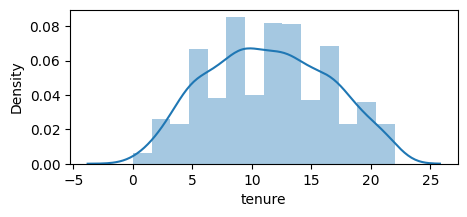

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
sns.distplot(new_customer_list['tenure'])

##2.2  Transaction Table preprocessed.

In [84]:
# Missing value in transaction (table 2)
print("online_order:",transaction['online_order'].isnull().mean())
print("brand/product_line/product_class/product_size/standard_cost/product_first_sold_date: \n",transaction['brand'].isnull().mean())
len(transaction[(transaction['brand'].isnull() |transaction['product_line'].isnull())])/len(transaction)

online_order: 0.018
brand/product_line/product_class/product_size/standard_cost/product_first_sold_date: 
 0.00985


0.00985

In [85]:
transaction[(transaction['brand'].isnull() |transaction['product_line'].isnull())].head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN


It seems that some rows have many missing values in multiple columns; but trnsactions could not be there without records like product class, product_size,... all that. So we should drop these rows

In [86]:
records_to_drop = transaction[transaction['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size',
                                'standard_cost', 'product_first_sold_date']].index
transaction.drop(index=records_to_drop, axis=0, inplace=True)
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [87]:
transaction['online_order'].fillna('Null', inplace=True, axis=0)

In [88]:
transaction['online_order'].value_counts()

1.0     9739
0.0     9706
Null     358
Name: online_order, dtype: int64

In [89]:
transaction['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [90]:
transaction['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [91]:
transaction['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [92]:
transaction['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [93]:
transaction['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

<ipython-input-94-f828ce1c4b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['list_price'])


<Axes: xlabel='list_price', ylabel='Density'>

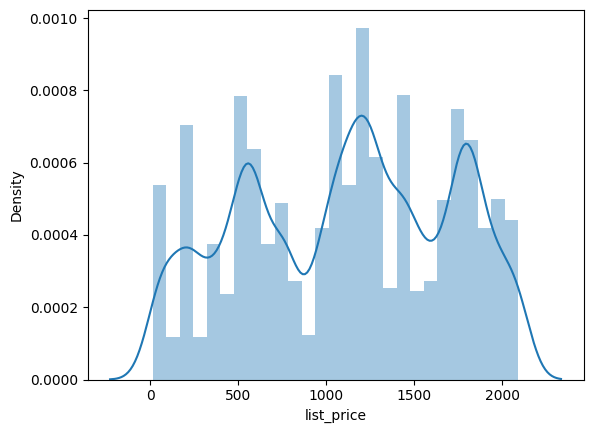

In [94]:
sns.distplot(transaction['list_price'])

<ipython-input-95-252dc2259ba5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction['standard_cost'])


<Axes: xlabel='standard_cost', ylabel='Density'>

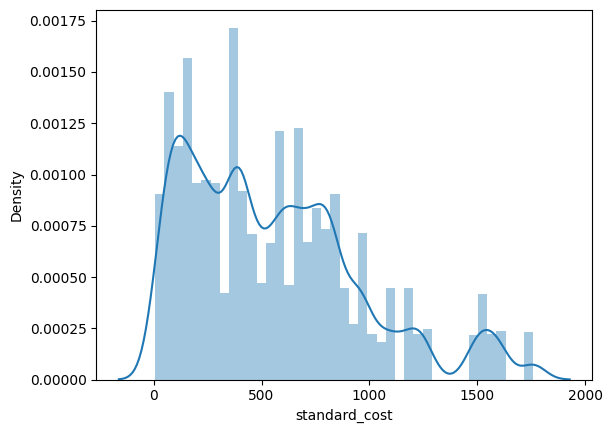

In [95]:
sns.distplot(transaction['standard_cost'])

## 2.3 Customer demographic



In [96]:
print("DOB: ", customer_demographic['DOB'].isnull().mean())#it calculate the number of missing values/the number of all values
print("job_title:",customer_demographic['job_title'].isnull().mean())
print("Job_industry_category:",customer_demographic['job_industry_category'].isnull().mean())

DOB:  0.02175
job_title: 0.1265
Job_industry_category: 0.164


In [97]:
customer_demographic['DOB'].fillna('Null', inplace=True, axis=0)
customer_demographic['job_title'].fillna('Null', inplace=True, axis=0)
customer_demographic['job_industry_category'].fillna('Null', inplace=True, axis=0)

<ipython-input-98-e6398a8f049a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_demographic['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

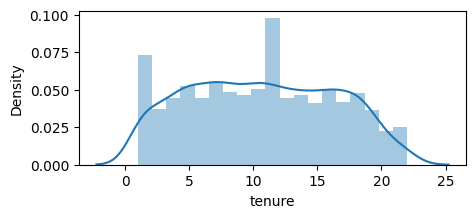

In [98]:
customer_demographic['DOB'].fillna('Null', inplace=True, axis=0)
customer_demographic['job_industry_category'].fillna('Null', inplace=True, axis=0)
customer_demographic['job_title'].fillna('Null', inplace=True, axis=0)
#Drop poorly defined column
customer_demographic.drop(columns = 'default', axis=0, inplace=True)
plt.figure(figsize=(5,2))
sns.distplot(customer_demographic['tenure'])

In [99]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  4000 non-null   object 
 6   job_title                            4000 non-null   object 
 7   job_industry_category                4000 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [100]:
first_name = customer_demographic['first_name']
last_name = customer_demographic['last_name']
combined_column = first_name.astype(str) + ' ' + last_name.astype(str)

customer_demographic['combined_column'] = combined_column

non_unique_values = customer_demographic[customer_demographic.duplicated(subset='combined_column', keep=False)]['combined_column'].unique()
print("not unique first name combined with last name: ",non_unique_values)

not unique first name combined with last name:  ['Corabelle nan' 'Lorettalorna nan']


In [101]:
customer_demographic[customer_demographic['combined_column'].isin(['Corabelle nan', 'Lorettalorna nan'])]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,combined_column
937,938,Corabelle,NaN,Female,18,1996-04-06 00:00:00,Technical Writer,Retail,Mass Customer,N,No,7.0,Corabelle nan
1089,1090,Lorettalorna,NaN,Female,15,1975-07-15 00:00:00,Computer Systems Analyst II,Telecommunications,Affluent Customer,N,No,17.0,Lorettalorna nan
1350,1351,Lorettalorna,NaN,U,32,Null,Office Assistant IV,IT,High Net Worth,N,No,NaN,Lorettalorna nan
1904,1905,Corabelle,NaN,Female,21,1953-09-17 00:00:00,Help Desk Technician,Manufacturing,Affluent Customer,N,No,15.0,Corabelle nan


This means they dont have duplicated rows but they do have duplicated value in name, WHICH MAKES IT DIFFICULT to mark unque column

In [102]:
customer_demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [103]:
replace_dict = {'F': 'Female', 'M': 'Male', 'Femal': 'Female'}
customer_demographic['gender'].replace(replace_dict, inplace=True)
customer_demographic['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

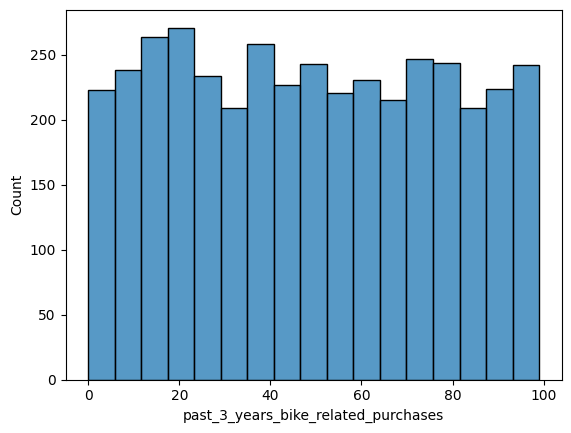

In [104]:
sns.histplot(customer_demographic['past_3_years_bike_related_purchases'])

<Axes: xlabel='tenure', ylabel='Count'>

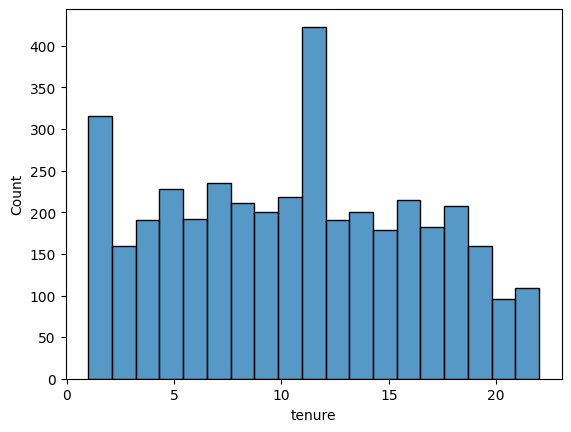

In [105]:
sns.histplot(customer_demographic['tenure'])

In [106]:
customer_demographic['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [107]:
customer_demographic['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [108]:
customer_demographic['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [109]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  4000 non-null   object 
 6   job_title                            4000 non-null   object 
 7   job_industry_category                4000 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [113]:
customer_demographic.dropna(subset=['tenure'], inplace=True)
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3792 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  owns_car                             3913 non-null   object 
 11  tenure                        

## 2.4 CustomerAddress

In [114]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


<Axes: xlabel='property_valuation', ylabel='Count'>

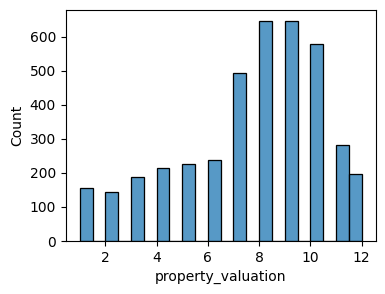

In [111]:
plt.figure(figsize=(4, 3))
sns.histplot(customer_address['property_valuation'])

In [110]:
customer_address['country'].value_counts()

Australia    3999
Name: country, dtype: int64

## 3. Saved data

In [115]:
new_customer_list.to_csv('new_customer_list_cleaned.csv', index=False)
transaction.to_csv('transaction.csv', index=False)
customer_demographic.to_csv('customer_demographic_cleaned.csv', index=False)
customer_address.to_csv('customer_address_cleaned.csv', index=False)